# Satellite Image Classification

# Dependencies

In [2]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pathlib import Path
from PIL import Image
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers

# Loading the images

In [3]:
image_link = list(Path('C:/Users/zaihd\Documents/Machine Learning Jupyter Notebook/sattelite Image/data').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

# Creating the DataFrame

In [4]:
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype=np.str)
df['name'] = image_name
df['label'] = image_label

C:\Users\zaihd\AppData\Local\Temp\ipykernel_7816\480777484.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['link'] = np.array(image_link, dtype=np.str)


In [5]:
df.head()

,link,name,label
0,C:\Users\zaihd\Documents\Machine Learning Jupy...,cloudy,0
1,C:\Users\zaihd\Documents\Machine Learning Jupy...,cloudy,0
2,C:\Users\zaihd\Documents\Machine Learning Jupy...,cloudy,0
3,C:\Users\zaihd\Documents\Machine Learning Jupy...,cloudy,0
4,C:\Users\zaihd\Documents\Machine Learning Jupy...,cloudy,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    5631 non-null   object
 1   name    5631 non-null   object
 2   label   5631 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 132.1+ KB


In [7]:
print(df['label'].unique())
print(df['name'].unique())

[0 1 2 3]
['cloudy' 'desert' 'green_area' 'water']


<AxesSubplot:>

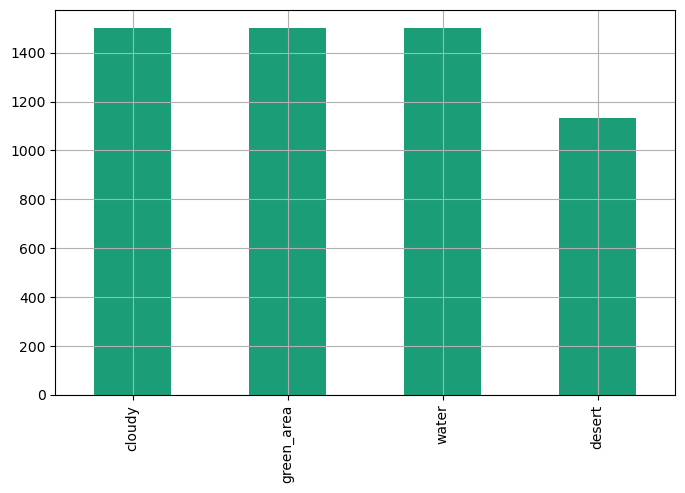

In [17]:
df.name.value_counts().plot(kind = 'bar', figsize = (8, 5), grid = True,  cmap=plt.colormaps['Dark2'])

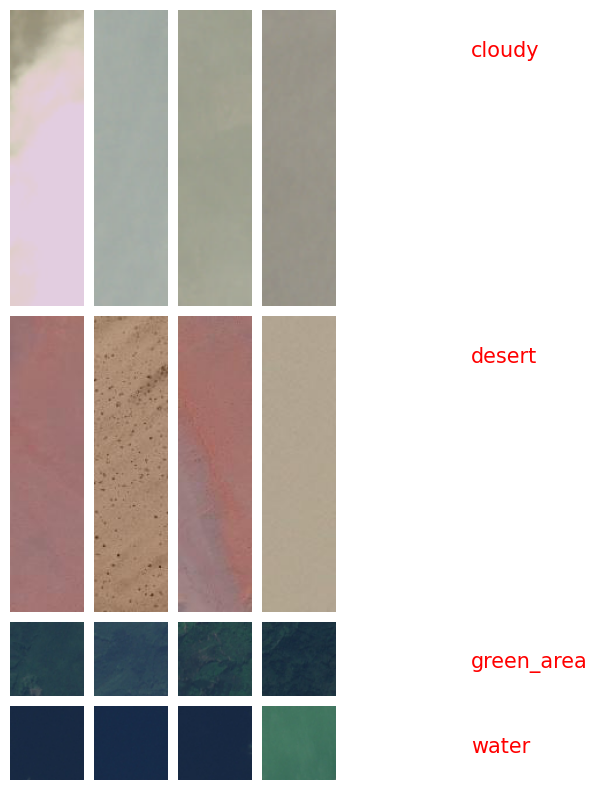

In [9]:
fig = plt.figure(1, figsize = (15,10))
grid = ImageGrid(fig, 121, nrows_ncols = (4,4), axes_pad = 0.10)
i = 0
for category_id, category in enumerate(df.name.unique()):
    for filepath in df[df['name'] == category]['link'].values[:4]:
        ax = grid[i]
        img = Image.open(filepath)
        ax.imshow(img)
        ax.axis('off')
        if i % 4 == 4-1:
            ax.text(180,35, category, verticalalignment = 'center', fontsize = 15, color ='red')
        i+=1
        
plt.show()

In [10]:
splitfolders.ratio(r'C:/Users/zaihd/Documents/Machine Learning Jupyter Notebook/sattelite Image/data', output = './', seed = 101,ratio = (.8,.1,.1))

In [11]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state = 1)

In [12]:
train_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = train_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical',
    subset = 'training'

)

test_images = ImageDataGenerator().flow_from_dataframe(
    dataframe = test_df,
    x_col = 'link',
    y_col = 'name',
    color_mode = 'rgb',
    batch_siz = 32,
    target_size=(28,28),
    clas_mode = 'categorical'
)

Found 3941 validated image filenames belonging to 4 classes.
Found 1690 validated image filenames belonging to 4 classes.


# Building the model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape = (28, 28, 3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),tf.keras.layers.Conv2D(32, (3,3),activation = 'relu'),tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

# Train the model

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_images, epochs = 3)

Epoch 1/3
124/124 [==============================] - 8s 51ms/step - loss: 1.6077 - accuracy: 0.7298
Epoch 2/3
124/124 [==============================] - 5s 39ms/step - loss: 0.4448 - accuracy: 0.8305
Epoch 3/3
124/124 [==============================] - 5s 37ms/step - loss: 0.3806 - accuracy: 0.8401


# Evaluation

In [15]:
model.evaluate(test_images)

53/53 [==============================] - 2s 38ms/step - loss: 0.4472 - accuracy: 0.7769


[0.447247713804245, 0.7769230604171753]